# Reference
https://pyimagesearch.com/2016/10/10/gradient-descent-with-python/

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt

import numpy as np

In [155]:
def sigmoid_activation(x):
    return 1.0 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    return x * (1 - x)

def predict(X: np.ndarray, W: np.ndarray):
    preds = sigmoid_activation(X.dot(W))
    preds[preds <= 0.5] = 0
    preds[preds > 0] = 1
    
    return preds

In [156]:
sample = np.array([1,2,3,4,5])
np.c_[sample, np.ones(len(sample))]

array([[1., 1.],
       [2., 1.],
       [3., 1.],
       [4., 1.],
       [5., 1.]])

In [157]:
X, y = make_blobs(n_samples=1000, n_features=2,  centers=2)
y = y.reshape(len(y), 1)
X = np.c_[X, np.ones(len(X))] # bias trick

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.5, random_state=42)

In [158]:
W = np.random.randn(X.shape[1], 1)
losses = []
epochs = 200
alpha = 0.001

for epoch in range(0, epochs):
    preds = sigmoid_activation(X_train.dot(W))
    error = preds - y_train
    loss = np.sum(error ** 2)
    losses.append(loss)
    
    d = error * sigmoid_deriv(preds)
    gradient = X_train.T.dot(d)
    W += -alpha * gradient
    
    if epoch == 0 or (epoch + 1) % 5 == 0:
        print("[INFO] epoch={}, loss={:.7f}".format(int(epoch + 1),
        loss))

[INFO] epoch=1, loss=32.5455918
[INFO] epoch=5, loss=1.6614878
[INFO] epoch=10, loss=1.1522215
[INFO] epoch=15, loss=0.9511546
[INFO] epoch=20, loss=0.8243690
[INFO] epoch=25, loss=0.7310742
[INFO] epoch=30, loss=0.6580361
[INFO] epoch=35, loss=0.5988980
[INFO] epoch=40, loss=0.5499066
[INFO] epoch=45, loss=0.5086049
[INFO] epoch=50, loss=0.4732884
[INFO] epoch=55, loss=0.4427286
[INFO] epoch=60, loss=0.4160148
[INFO] epoch=65, loss=0.3924565
[INFO] epoch=70, loss=0.3715199
[INFO] epoch=75, loss=0.3527861
[INFO] epoch=80, loss=0.3359212
[INFO] epoch=85, loss=0.3206559
[INFO] epoch=90, loss=0.3067705
[INFO] epoch=95, loss=0.2940840
[INFO] epoch=100, loss=0.2824459
[INFO] epoch=105, loss=0.2717298
[INFO] epoch=110, loss=0.2618293
[INFO] epoch=115, loss=0.2526534
[INFO] epoch=120, loss=0.2441247
[INFO] epoch=125, loss=0.2361761
[INFO] epoch=130, loss=0.2287498
[INFO] epoch=135, loss=0.2217952
[INFO] epoch=140, loss=0.2152684
[INFO] epoch=145, loss=0.2091304
[INFO] epoch=150, loss=0.203347

In [159]:
preds = predict(X_valid, W)
classification_report(y_valid, preds)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       243\n           1       1.00      1.00      1.00       257\n\n    accuracy                           1.00       500\n   macro avg       1.00      1.00      1.00       500\nweighted avg       1.00      1.00      1.00       500\n'

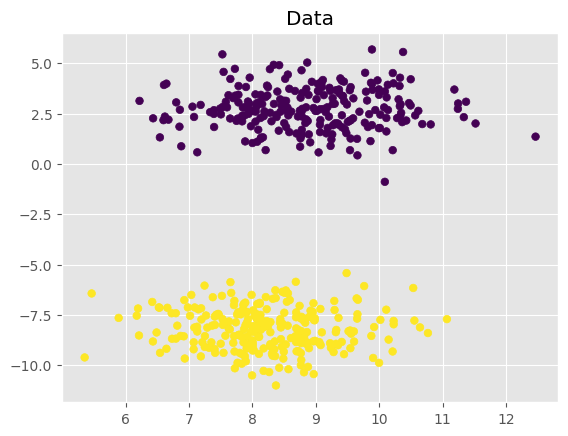

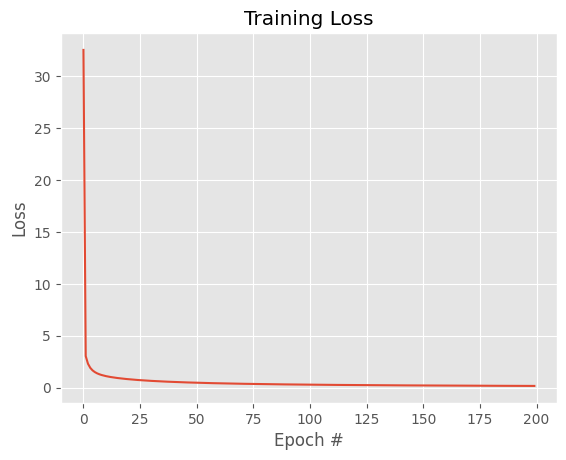

In [160]:
# plot the (testing) classification data
plt.style.use("ggplot")
plt.figure()
plt.title("Data")
plt.scatter(X_valid[:, 0], X_valid[:, 1], marker="o", c=y_valid[:, 0], s=30)
# construct a figure that plots the loss over time
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), losses)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()